<a href="https://colab.research.google.com/github/jeydion/Capstone_Project_1/blob/master/Data_Story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hashlib

In [0]:
books_url = 'https://raw.githubusercontent.com/jeydion/goodbooks-10k/master/books.csv'
books_df = pd.read_csv(books_url, index_col = 0)

In [26]:
books_df.columns

Index(['goodreads_book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [27]:
books_df.head()

,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
book_id,,,,,,,,,,,,,,,,,,,,,
1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


Data Clean Tasks:
remove columns [1,2,3,4,5,8,20,21]
change original_publication_year to just YYYY
parse non-english books and find english titles for text
eliminate redundant data (if any)
add mean, median, mode rating for each book
add genres (try adding with isbn API; incorporate top ten shelves per book from xml files)

In [28]:
# Remove columns [1,2,3,4,5,8,20,21]. These columns either contain duplicate or irrelevant information for this project

books_df.drop(books_df.columns[[1,2,3,4,5,8,12,20,21]], axis=1, inplace=True)
books_df.head()

,goodreads_book_id,authors,original_publication_year,title,language_code,average_rating,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
book_id,,,,,,,,,,,,,
1,2767052,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4942365,155254,66715,127936,560092,1481305,2706317
2,3,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4800065,75867,75504,101676,455024,1156318,3011543
3,41865,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",en-US,3.57,3916824,95009,456191,436802,793319,875073,1355439
4,2657,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3340896,72586,60427,117415,446835,1001952,1714267
5,4671,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2773745,51992,86236,197621,606158,936012,947718
6,11870085,John Green,2012.0,The Fault in Our Stars,eng,4.26,2478609,140739,47994,92723,327550,698471,1311871
7,5907,J.R.R. Tolkien,1937.0,The Hobbit,en-US,4.25,2196809,37653,46023,76784,288649,665635,1119718
8,5107,J.D. Salinger,1951.0,The Catcher in the Rye,eng,3.79,2120637,44920,109383,185520,455042,661516,709176
9,960,Dan Brown,2000.0,"Angels & Demons (Robert Langdon, #1)",en-CA,3.85,2078754,25112,77841,145740,458429,716569,680175


In [0]:
#rename columns
books_df = books_df.rename(columns={'language_code': 'lang', 'original_publication_year': 'year'})

In [54]:
# Fill in missing book year values
books_df.loc[9929, 'year'] = 2006
books_df[books_df.year.isnull()].head(3)

,goodreads_book_id,authors,year,title,lang,average_rating,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
book_id,,,,,,,,,,,,,


In [57]:
#Change year column to int

books_df.year.astype(int)

book_id
1        2008
2        1997
3        2005
4        1960
5        1925
6        2012
7        1937
8        1951
9        2000
10       1813
11       2003
12       2011
13       1949
14       1945
15       1947
16       2005
17       2009
18       1999
19       1954
20       2010
21       2003
22       2002
23       1998
24       2000
25       2007
26       2003
27       2005
28       1954
29       1595
30       2012
         ... 
9971     2011
9972     1999
9973     1999
9974     1978
9975     1985
9976     2009
9977     1995
9978     1963
9979     1964
9980     2006
9981     2005
9982     2016
9983     2009
9984     1978
9985     2000
9986     2006
9987     2010
9988     1971
9989     2012
9990     1989
9991     1991
9992     2012
9993     2008
9994     2009
9995     1924
9996     2010
9997     1990
9998     1977
9999     2011
10000    1998
Name: year, Length: 10000, dtype: int64

In [60]:
print(type(books_df.year))

<class 'pandas.core.series.Series'>


# Missing Values

Found there are 21 NAN values in the Year column. Since the amount is so low, I will manually replace the nan values with the correct years.

There are 700 missing ISBNs from the DataFrame. Though there are methods for finding the missing values programatically. I have decided to drop these two columns from the DataFrame. According the isbn.org, each 10 or 13 digit number assigned to every book does not correspond with the genre. (https://www.isbn.org/faqs_general_questions). 

I will reference the books by their goodreads_book_id. This will help reference each book in the other dataframes that are attached to this dataset as well. 

There are 1084 books that have nan values for lang (book language) upon review of all the books, they are all in english and the nan value can be replaced with 'eng'

There are 67 books that are in Arabic and Persian, in which there might not be English translations or said translations aren't the version of the book the reviews are referring. It would be exceedingly difficult to compare the data with the english or english translation books

In [61]:
#Unique columns
books_df.lang.unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

In [0]:
#Change all English books to 'eng'
books_df = books_df.replace({'lang' : { 'en-US': 'eng', 'en-CA': 'eng', 'en-GB': 'eng', 'en': 'eng'}})


In [0]:
# Analyze individual languages
# books_df[books_df.lang.isnull()]
books_df2 = books_df.lang.fillna('eng', inplace=True)
#books_df.head()

In [0]:
# dropped columns
# isbn, isbn13, 

# dropped books
# Any books by BookRags; they make study guides and lesson plans based on books. 
books_df = books_df[books_df.authors != 'BookRags']

In [0]:
books_df = books_df[books_df.lang != 'ara']
books_df = books_df[books_df.lang != 'per']

In [0]:
nebooks_df = books_df[books_df.lang != 'eng']
# nebooks_df

In [0]:
df = books_df.copy()

In [68]:
# Visual Data Exploration
%matplotlib inline

# Average rating for all books
df.average_rating.describe()

count    9928.000000
mean        4.003294
std         0.253110
min         2.470000
25%         3.850000
50%         4.020000
75%         4.180000
max         4.820000
Name: average_rating, dtype: float64

In [69]:
#Median book rating
df.average_rating.median()

4.02

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f067bb81208>,
      dtype=object)

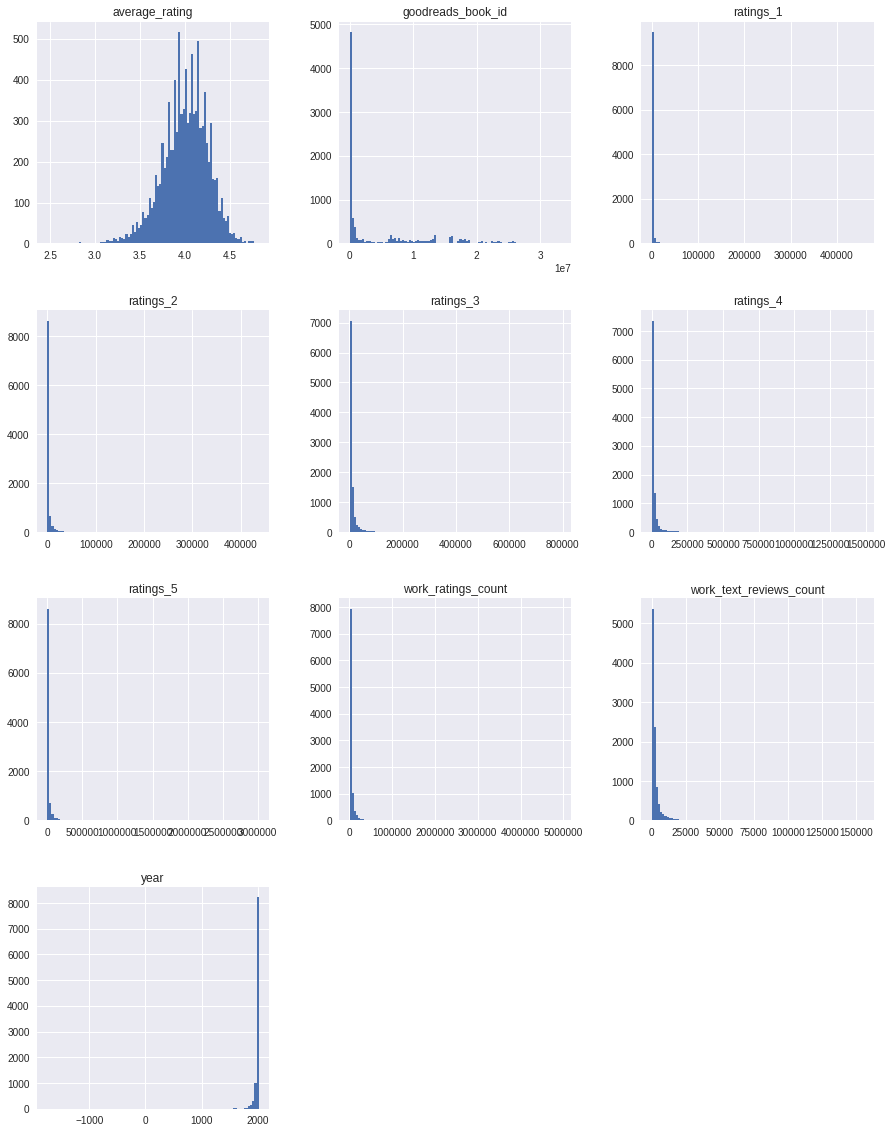

In [70]:
df.hist(bins=100, figsize= (15, 20))


Based on preliminary visual data exploration, it appears there is mean book rating is 4.00, slightly lower than the median 4.02. Many of the ratings_ catergories are tail heavy. These will be transformed later to have more of a bell shape. Below I will compare each ratings_ category with respect to the average book rating to see if there are any correllations.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


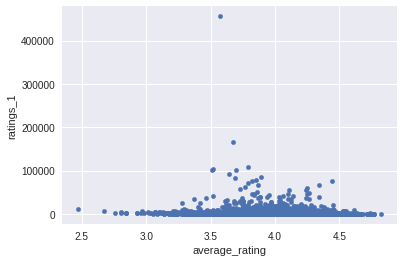

In [71]:
df.plot.scatter(x='average_rating', y='ratings_1')

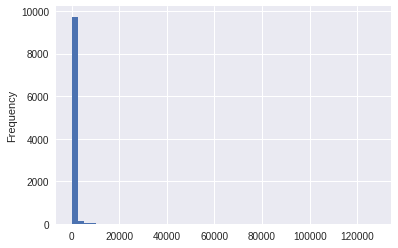

In [72]:
df['ratings1_per_average'] = df.ratings_1 / df.average_rating
df.ratings1_per_average.plot.hist(bins=50)

No real insights can be made from comparing the average rating with each of the amount of ratings per book. At this point I will seperate out the training and test data and continue visual exploration of the training data.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


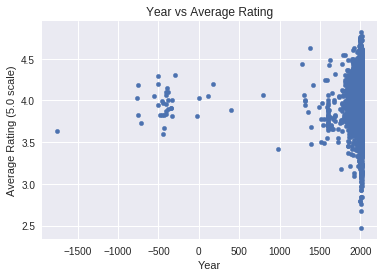

In [86]:
_ = df.plot.scatter(x='year', y='average_rating')
_ = plt.xlabel('Year')
_ = plt.ylabel('Average Rating (5.0 scale)')
_ = plt.title('Year vs Average Rating')
_ = plt.show()

In [0]:
df_cleaned = df[['authors', 'year', 'title', 'average_rating']]

In [0]:
df = df_cleaned

In [89]:
df.head()

,authors,year,title,average_rating
book_id,,,,
1,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",4.34
2,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44
3,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",3.57
4,Harper Lee,1960.0,To Kill a Mockingbird,4.25
5,F. Scott Fitzgerald,1925.0,The Great Gatsby,3.89


In [95]:
df.year.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9928 entries, 1 to 10000
Data columns (total 4 columns):
authors           9928 non-null object
year              9928 non-null int64
title             9928 non-null object
average_rating    9928 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 707.8+ KB


In [96]:
df.head()

,authors,year,title,average_rating
book_id,,,,
1,Suzanne Collins,2008,"The Hunger Games (The Hunger Games, #1)",4.34
2,"J.K. Rowling, Mary GrandPré",1997,Harry Potter and the Sorcerer's Stone (Harry P...,4.44
3,Stephenie Meyer,2005,"Twilight (Twilight, #1)",3.57
4,Harper Lee,1960,To Kill a Mockingbird,4.25
5,F. Scott Fitzgerald,1925,The Great Gatsby,3.89


<ol>Steps:
Ask the following questions and look for the answers using code and plots:
<li>Can you count something interesting?</li>
  <li>Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?</li>
  <li>Can you make a bar plot or a histogram?</li>
  <li>Can you compare two related quantities?</li>
  <li>Can you make a scatterplot?</li>
  <li>Can you make a time-series plot?</li>
<ul>Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?
Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?</ul></ol>


---
<ol>
  <li> Upon first looking at the data I have decided to remove many of the columns that were provided because most were either redundant or not relevant. Also, since I cannot link the book genre to the ISBN, I have decided to no longer pursue the goal of recommending books based outside their genre. Now I will look for other methods to recommend books. One method is by looking at the year or the average rating for a book in conjunction with the author.  </li>
  <li> Something interesting I did not expect is the year the book was released doesn't seem to be correlated with its average rating. It seems there is a wide range of average ratings and further analysis is needed to find additional correlations between book rating and year.</li>
  <li>I can make bar chart and histograms but as can be seen above, the information doesn't reveal much about the data. A scatter plot is much more useful in this situation.</li>
  <li> A scatter plot allows me to compare the year and average rating for each book. Of all the data presented in the original dataset, these two columns seem to be the most useful in my analysis.</li>
  <li> Though there is a wide range of time for the year column, there doesn't seem to be any correlation between year and book rating. However, it may be interesting to divide the books into time groups or periods and further compare the data.<li>
  <ul>H0: Most books rated are above 4.0 rating regardless of year. </ul>
  <ul>Most people want to read new books but don't know where to start. With a recommendation system such as this, people can now find books that are highly rated by other people and can trust that the book will pique their interest. A multitude of institutions can use this as well. A company like Amazon or Goodreads can recommend books to their users which will encourage more customer engagement with their respective brands. In the case of Amazon, this can lead to future sales. Though this dataset doesn't have all the information to make the perfect recommendation, it lays the groundwork for further developement. </ul>
